In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from metpy.cbook import get_test_data
from metpy.io.gini import GiniFile
from metpy.plots.ctables import registry

%matplotlib inline

In [2]:
# Open the GINI file from the test data
f = GiniFile(get_test_data('WEST-CONUS_4km_WV_20151208_2200.gini'))
print(f)

GiniFile: GOES-15 West CONUS WV (6.5/6.7 micron)
	Time: 2015-12-08 22:00:19
	Size: 1280x1100
	Projection: lambert_conformal
	Lower Left Corner (Lon, Lat): (-133.4588, 12.19)
	Resolution: 4km


In [3]:
# Get a Dataset view of the data (essentially a NetCDF-like interface to the
# underlying data). Pull out the data, (x, y) coordinates, and the projection
# information.
ds = f.to_dataset()
x = ds.variables['x'][:]
y = ds.variables['y'][:]
dat = ds.variables['WV']
proj_var = ds.variables[dat.grid_mapping]
print(proj_var)

<class 'metpy.io.cdm.Variable'>: int32 Lambert_Conformal()
	grid_mapping_name: lambert_conformal_conic
	standard_parallel: 25.0
	longitude_of_central_meridian: -95.0
	latitude_of_projection_origin: 25.0
	earth_radius: 6371200.0


In [4]:
# Create CartoPy projection information for the file
globe = ccrs.Globe(ellipse='sphere', semimajor_axis=proj_var.earth_radius,
                   semiminor_axis=proj_var.earth_radius)
proj = ccrs.LambertConformal(central_longitude=proj_var.longitude_of_central_meridian,
                             central_latitude=proj_var.latitude_of_projection_origin,
                             standard_parallels=[proj_var.standard_parallel],
                             globe=globe)

/Users/jleeman/anaconda/lib/python2.7/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/jleeman/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


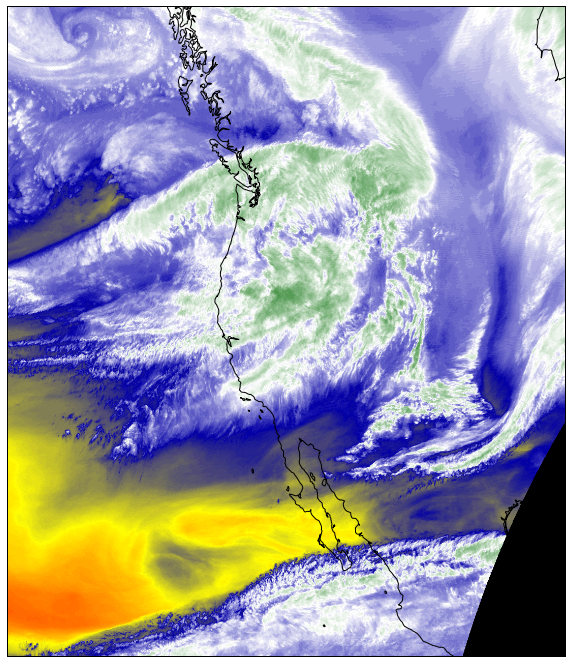

In [5]:
# Plot the image
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(1, 1, 1, projection=proj)
wv_norm, wv_cmap = registry.get_with_steps('WVCIMSS', 0, 1)
im = ax.imshow(dat[:], cmap=wv_cmap, norm=wv_norm, zorder=0,
               extent=(x.min(), x.max(), y.min(), y.max()), origin='upper')
ax.coastlines(resolution='50m', zorder=2, color='black')